In [66]:
import numpy as np
import os
import matplotlib.pyplot as plt
from common import Reward, Action
from icecream import ic

In [67]:
output_dir = "output/20250812-13-05-alignment"

T = 40000
trials = [6]
num_trials = len(trials)
K = 32
K_env = K // 2

all_regrets = np.zeros((num_trials, 1, T), dtype=Reward)
all_actions = np.zeros((num_trials, 1, T), dtype=Action)

for i, trial_num in enumerate(trials):
    seed = 30 + trial_num
    filename = f"{trial_num}_IDS_seed{seed}.npy"
    with open(os.path.join(output_dir, f"regrets_{filename}"), 'rb') as f:
        all_regrets[i] = np.load(f)
    with open(os.path.join(output_dir, f"actions_{filename}"), 'rb') as f:
        all_actions[i] = np.load(f)

regrets_IDS = all_regrets[:,0,:]
actions_IDS = all_actions[:,0,:]

In [68]:
env_actions = (actions_IDS < 16).astype(int)
human_actions = 1 - env_actions

cum_env_actions = np.cumsum(env_actions, axis=1)
cum_human_actions = np.cumsum(human_actions, axis=1)

In [69]:
ic(actions_IDS)
ic(human_actions)
ic(cum_human_actions)

ic| actions_IDS: array([[ 5,  8,  4, ..., 14,  5,  5]], shape=(1, 40000), dtype=uint8)
ic| human_actions: array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 40000))
ic| cum_human_actions: array([[  0,   0,   0, ..., 392, 392, 392]], shape=(1, 40000))


array([[  0,   0,   0, ..., 392, 392, 392]], shape=(1, 40000))

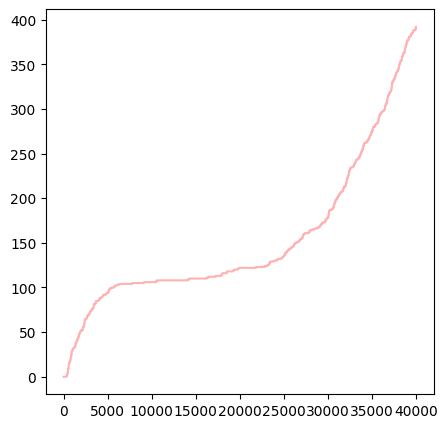

In [70]:
plt.figure(figsize=(5,5))
for i in range(len(all_actions)):
    # plt.plot(np.arange(1, len(actions)+1), cum_env_actions[i], color='blue', alpha=0.3)
    plt.plot(np.arange(T), cum_human_actions[i], color='red', alpha=0.3)
    ...

# min_t = len(all_actions[0])

# plt.plot(np.arange(10, min_t, 1), np.mean(cum_human_actions, axis=0)[10:])
# plt.fill_between(np.arange(10, min_t, 1), np.mean(cum_human_actions, axis=0)[10:] + np.std(cum_human_actions, axis=0)[10:], np.mean(cum_human_actions, axis=0)[10:] - np.std(cum_human_actions, axis=0)[10:], alpha=0.3)

sqrt_t_log_t = np.sqrt(np.arange(10, T, 1)) * np.log(np.arange(10, T, 1))
log_t = np.log(np.arange(10, T, 1)) * np.log(np.arange(10, T, 1))

# plt.plot(np.arange(10, T, 1), np.arange(10, T, 1), color='black', linestyle='--')
# plt.plot(np.arange(10, T, 1), 30*sqrt_t_log_t, color='black', linestyle='--')
# plt.plot(np.arange(10, T, 1), log_t**2, color='black', linestyle='--')

# plt.xscale('log')
# plt.yscale('log')
# plt.axis('equal')
plt.show()

In [71]:
actions = actions_IDS[0]

In [79]:
unique, counts = np.unique(actions, return_counts=True)

for i in range(16):
    ic(f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}")

n_h = sum(counts[16:])
n_env = sum(counts[:16])
ic(n_h)
ic(f"proportion: {n_h / (n_h + n_env)}")

ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '0: 446		 0h: 25'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '1: 139		 1h: 23'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '2: 304		 2h: 23'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '3: 458		 3h: 23'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '4: 194		 4h: 15'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '5: 18072		 5h: 27'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '6: 260		 6h: 29'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '7: 1144		 7h: 28'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '8: 589		 8h: 27'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '9: 331		 9h: 24'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '10: 314		 10h: 20'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '11: 351		 11h: 22'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '12: 268		 12h: 28'
ic| f"{i}: {counts[i]}\t\t {i}h: {counts[i+16]}": '13: 916		 13h: 25'
ic| f"{i}: {counts[i]}\t\t {i}h: {cou

'proportion: 0.0098'

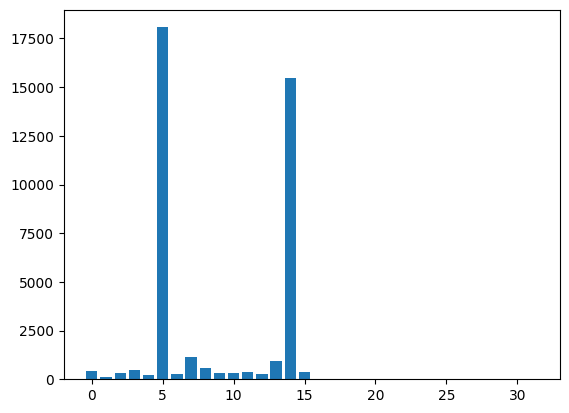

In [73]:
plt.bar(unique, counts)
plt.show()